In [130]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# Creating custom legend handles
import matplotlib.lines as mlines
import sys
import os
import re
from tqdm import tqdm

def path_link(path:str):
    sys.path.append(path)

path_link('/master/code/lib')

import utils.stats as stats
import utils.testing_gen as gen
import utils.loading as load
import utils.nn_gen as nn_gen
from utils.tools import array2List

In [127]:
PATH = ['/master/code/last/finished_exps/baseline']

In [128]:
class id():
    def __init__(self):
        self.dropout = None
        self.l1 = None
        self.path = None
        self.loss = None
        self.eval_loss = None
        self.eval_sim_loss = None
        self.data_type = None
        self.action_r = None


    def load_id(self, path:str):
        try:
            if 'scaleL1' in path:
                nb_layer_match = re.search(r'scaleL1-(\d+\.\d+|\d+)', path)
                self.l1 = float(nb_layer_match.group(1))
            dropout_match = re.search(r'dropout-(\d+)', path)


            if 'action' in path:
                self.action_r = 1
            else:
                0



            self.dropout = int(dropout_match.group(1))

            if 'noisy' in path:
                self.data_type = 'noisy'

            elif 'normal' in path:
                self.data_type = 'normal'
            
            
            self.path = path

            self.loss = os.path.join(os.path.dirname(path), 'loss_list.npy')
            self.eval_loss = os.path.join(os.path.dirname(path), 'eval_list.npy')
            self.eval_sim_loss = os.path.join(os.path.dirname(path), 'eval_sim_list.npy')
        except:
            print(path)

    def label(self):
        return f'{self.data_type}_action-{self.action_r}_dropout{self.dropout}_l1-{self.l1}'

In [129]:
def get_path_models(path):

    res = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('best.pt'):
                id_model = id()
                id_model.load_id(os.path.join(root, file))

                res.append(id_model)


    return res

In [131]:
res = []

for path in PATH:
    res.extend(get_path_models(path))

In [132]:
for r in res:
    print(f'{r.path} >>> {r.__dict__}')

/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-0/model_trained/baseline_action-react_best.pt >>> {'dropout': 0, 'l1': 0.0, 'path': '/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-0/model_trained/baseline_action-react_best.pt', 'loss': '/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-0/model_trained/loss_list.npy', 'eval_loss': '/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-0/model_trained/eval_list.npy', 'eval_sim_loss': '/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-0/model_trained/eval_sim_list.npy', 'data_type': 'noisy', 'action_r': 1}
/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-1/model_trained/baseline_action-react_best.pt >>> {'dropout': 1, 'l1': 0.0, 'path': '/master/code/last/finished_exps/baseline/mt-baseline_action-reac

In [133]:
list_lost = [r.loss for r in res]
list_eval = [r.eval_loss for r in res]
list_sim = [r.eval_sim_loss for r in res]
labels = [r.label() for r in res]

In [155]:
runs_normal=[]
runs_noisy=[]
res_no_drop = []
name_normal = []
name_noisy = []


for i, r in enumerate(res):
    if r.data_type == 'noisy':
        runs_noisy.append(r)
    elif r.data_type == 'normal':
        runs_normal.append(r)


list_lost_normal = [r.loss for r in runs_normal]
list_eval_normal = [r.eval_loss for r in runs_normal]
list_sim_normal = [r.eval_sim_loss for r in runs_normal]
labels_normal = [r.label() for r in runs_normal]


list_lost_noisy = [r.loss for r in runs_noisy]
list_eval_noisy = [r.eval_loss for r in runs_noisy]
list_sim_noisy = [r.eval_sim_loss for r in runs_noisy]
labels_noisy = [r.label() for r in runs_noisy]


8it [00:00, 34.38it/s]


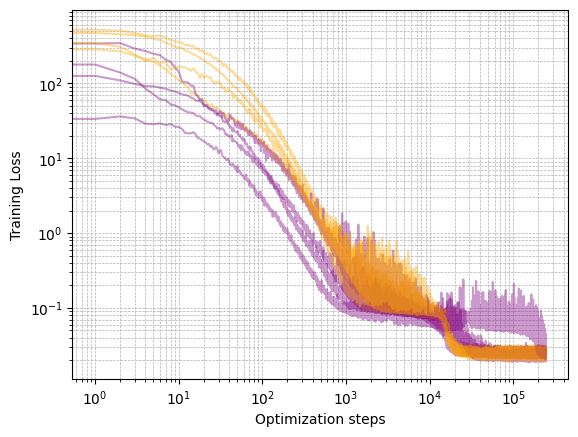

In [156]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_lost)):
    v = np.load(loss)
    plt.loglog(v, color = color[i], alpha = 0.4)

plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Optimization steps')
plt.ylabel('Training Loss')
plt.show()

In [157]:
print(len(list_lost_normal))
print(len(runs_normal))

4
4


In [158]:
print(runs_normal[0].path)
print(runs_normal[1].path)

/master/code/last/finished_exps/baseline/mt-baseline_action-react_normal_scaleL1-0_dropout-0/model_trained/baseline_action-react_best.pt
/master/code/last/finished_exps/baseline/mt-baseline_action-react_normal_scaleL1-0_dropout-1/model_trained/baseline_action-react_best.pt


4it [00:00, 28.52it/s]


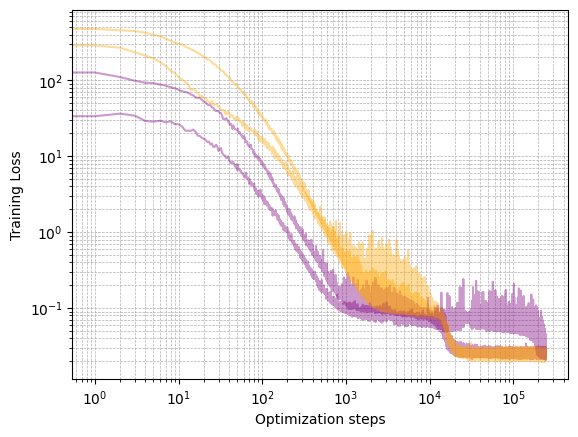

In [159]:
list_eval_loss = []
color = []
layerNorm = 0

for r in runs_normal:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_lost_normal)):
    v = np.load(loss)
    plt.loglog(v, color = color[i], alpha = 0.4)

plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Optimization steps')
plt.ylabel('Training Loss')
plt.show()

4it [00:00, 35.31it/s]


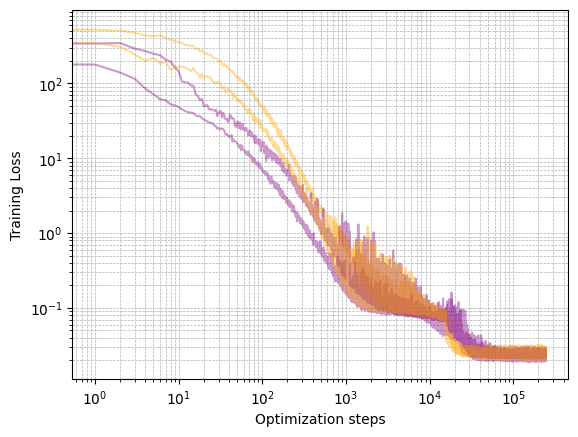

In [160]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_lost_noisy)):
    v = np.load(loss)
    plt.loglog(v, color = color[i], alpha = 0.4)

plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Optimization steps')
plt.ylabel('Training Loss')
plt.show()

8it [00:00, 73.95it/s]


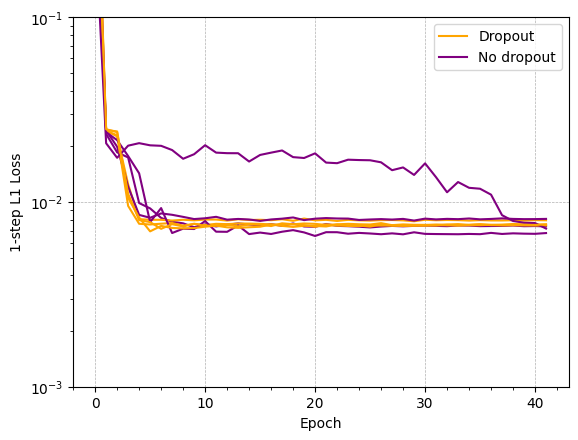

In [161]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_eval)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')
dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epoch')
plt.ylabel('1-step L1 Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.ylim([0.001, 0.1])
plt.show()

4it [00:00, 89.25it/s]


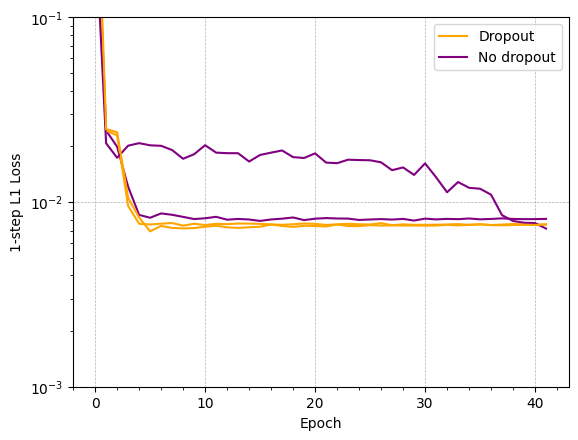

In [162]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_eval_normal)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')
dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epoch')
plt.ylabel('1-step L1 Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.ylim([0.001, 0.1])
plt.show()

4it [00:00, 58.76it/s]


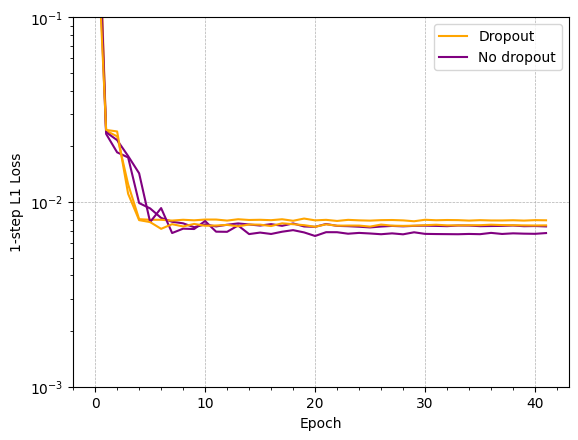

In [163]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_eval_noisy)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')
dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epoch')
plt.ylabel('1-step L1 Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.ylim([0.001, 0.1])
plt.show()

8it [00:00, 69.89it/s]


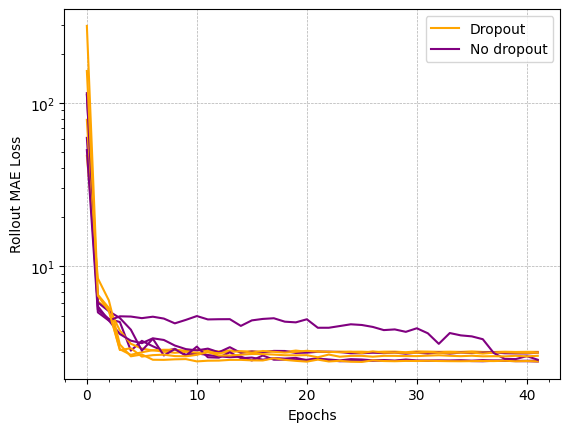

In [164]:
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_sim)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')

dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epochs')
plt.ylabel('Rollout MAE Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.show()

4it [00:00, 64.86it/s]


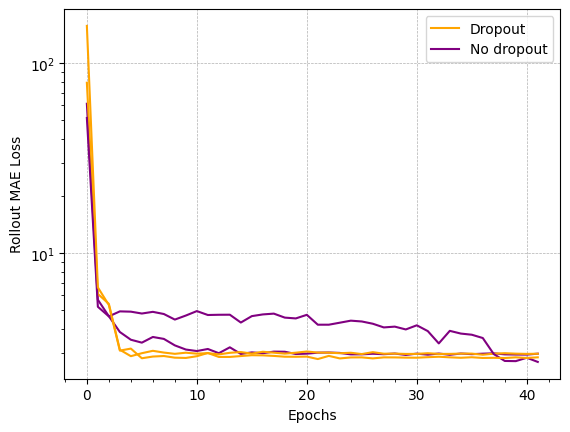

In [165]:
color = []
layerNorm = 0

for r in runs_normal:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_sim_normal)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')

dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epochs')
plt.ylabel('Rollout MAE Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.show()

/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-0/model_trained/baseline_action-react_best.pt
/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-1/model_trained/baseline_action-react_best.pt
/master/code/last/finished_exps/baseline/mt-baseline_noisy_dt-0.001_tr-1-step_NLayers-0_dropout-0_layerNorm-0/model_trained/baseline_best.pt
/master/code/last/finished_exps/baseline/mt-baseline_noisy_dt-0.001_tr-1-step_NLayers-0_dropout-1_layerNorm-0/model_trained/baseline_best.pt
/master/code/last/finished_exps/baseline/mt-baseline_noisy_dt-0.001_tr-1-step_NLayers-0_dropout-1_layerNorm-0/model_trained/baseline_best.pt


4it [00:00, 66.32it/s]


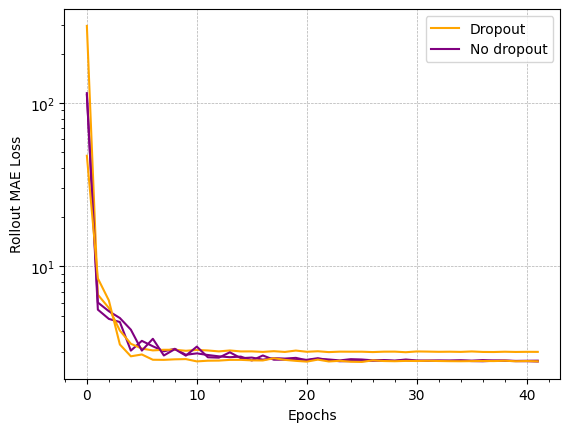

In [166]:
color = []
layerNorm = 0

for r in runs_noisy:
    print(r.path)
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')
print(r.path)

for i, loss in tqdm(enumerate(list_sim_noisy)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')

dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epochs')
plt.ylabel('Rollout MAE Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.show()